In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [28]:
df = pd.read_csv("Housing.csv")

In [29]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [32]:
# converting categorical data to numerical
df_new = pd.get_dummies(df, drop_first=True)

In [33]:
# splilting data into train and test sets
x = df_new.drop("price", axis=1)
y = df_new["price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
# implementing Linear Regression model
lrm = LinearRegression()
lrm.fit(x_train, y_train)
y_pred = lrm.predict(x_test)

In [35]:
# Evaluating models accuracy by --> 1.Mean absolute error 2.Mean Squared Error 3.R-Squared Error 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [36]:
mae

970043.403920164

In [37]:
mse

1754318687330.6643

In [38]:
r2

0.6529242642153184

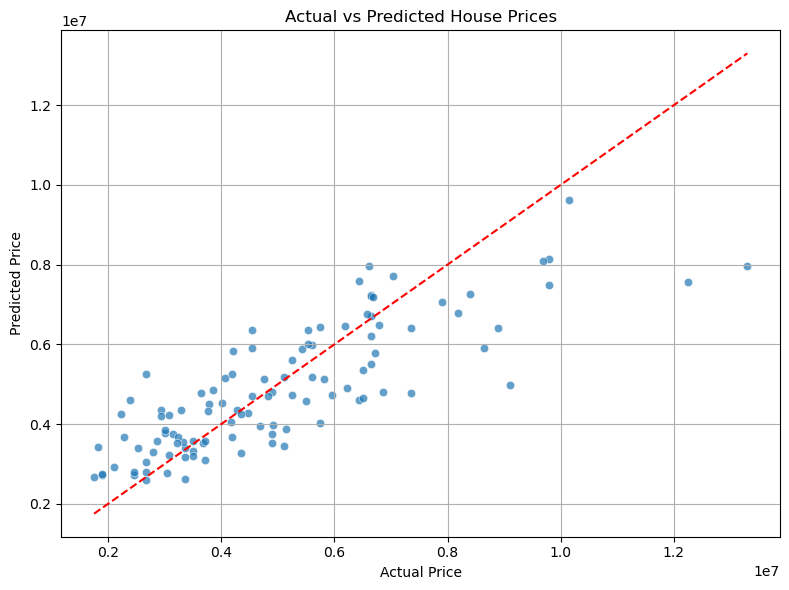

In [39]:
# plotting graph "ACTUAL PRICE" VS "PREDICTED PRICE"

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Ideal line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
# Interpret Coefficients
coef = pd.Series(lrm.coef_, index=x.columns).sort_values(ascending=False)

In [41]:
coef.head(10)

bathrooms              1.094445e+06
airconditioning_yes    7.914267e+05
hotwaterheating_yes    6.846499e+05
prefarea_yes           6.298906e+05
stories                4.074766e+05
basement_yes           3.902512e+05
mainroad_yes           3.679199e+05
guestroom_yes          2.316100e+05
parking                2.248419e+05
bedrooms               7.677870e+04
dtype: float64

In [42]:
coef.tail(10)

prefarea_yes                       629890.565313
stories                            407476.594985
basement_yes                       390251.176181
mainroad_yes                       367919.947680
guestroom_yes                      231610.037176
parking                            224841.913277
bedrooms                            76778.701634
area                                  235.968805
furnishingstatus_semi-furnished   -126881.817585
furnishingstatus_unfurnished      -413645.062228
dtype: float64